# Calculation of affected population

The impacts of a typoon event are most strongly felt through the impacts on the community - the extent of building damage, the costs of repaiir and recovery and the number of people that require alternative accomodation while their houses are repaired. Here, we demonstrate the process to calculate the number of people affected by the impacts of a typhoon. 

It uses the fragility information on the different building types and the population information as described in the exposure database for the project. From these, we use monte carlo simulation to determine the probable damage state of all building types for a given typhoon event, and then from this we can evaluate the number of people affected. 

## Fragility curves

The fragility curves describe the probablity of a selected building type existing in a given damage state. For the GMMA RAP, the damage states were defined as slight, moderate, extensive and complete, and were based on the definitions from HAZUS-MH (Vickery _et al._, 2006). 



The following code block will plot the damage curve for a concrete wall building with wood or steel frame structure for the upper storey. 

In [8]:
%matplotlib inline

In [9]:
import numpy as np
from scipy.stats import lognorm

import matplotlib.pyplot as plt

def plotcurve(windspeed):
    
    x = np.arange(0, 361., 1.)
    
    v_mu = 321.
    v_sd = 0.52
    v_sc = 1.0
    
    s_mu = 139.
    s_sd = 0.34
    s_sc = 1.0
    
    m_mu = 162.
    m_sd = 0.30
    m_sc = 1.0
    
    e_mu = 218.
    e_sd = 0.29
    e_sc = 1.0
    
    c_mu = 263.
    c_sd = 0.31
    c_sc = 1.0
    
    vcdf = v_sc * lognorm.cdf(x, v_sd, scale=v_mu)
    
    spdf = s_sc * lognorm.pdf(x, s_sd, scale=s_mu)
    mpdf = m_sc * lognorm.pdf(x, m_sd, scale=m_mu)
    epdf = e_sc * lognorm.pdf(x, e_sd, scale=e_mu)
    cpdf = c_sc * lognorm.pdf(x, c_sd, scale=c_mu)
    
    spdf[0] = 0.
    mpdf[0] = 0.
    epdf[0] = 0.
    cpdf[0] = 0.
    
    scdf = s_sc * lognorm.cdf(x, s_sd, scale=s_mu)
    mcdf = m_sc * lognorm.cdf(x, m_sd, scale=m_mu)
    ecdf = e_sc * lognorm.cdf(x, e_sd, scale=e_mu)
    ccdf = c_sc * lognorm.cdf(x, c_sd, scale=c_mu)
    
    
    
    # Set up the figure canvas:
    fig, ax1 = plt.subplots(1,1, figsize=(10,6))
    """
    ax2.fill_between(x, 0, vcdf, facecolor='b', alpha=0.25)
    ax2.set_xlim((0,360))
    ax2.set_ylim((0,1))
    ax2.set_ylabel('Damage ratio')
    ax2.axvline(windspeed, color='k',linestyle=':')
    
    ypos = v_sc * lognorm.cdf(windspeed, v_sd, scale=v_mu)
    if ypos < 0.95:
        ax2.text(windspeed+2, ypos+0.05, "%.3f"%ypos, fontsize='x-small',
                 color='b', ha='left', va='center')
    else:
        ax2.text(windspeed+2, ypos-0.05, "%.3f"%ypos, fontsize='x-small',
                 color='b', ha='left', va='center')
    ax2.grid(True)
    ax2.set_title("Building damage ratio - %s"%buildingtype)
    """
    ax1.fill_between(x, 0, ccdf, facecolor='k', alpha=0.25)
    ax1.plot(x, ccdf, 'k', linewidth=1.)
    ax1.fill_between(x, ccdf, ecdf, facecolor='r', alpha=0.25)
    ax1.plot(x, ecdf, 'r', linewidth=1.)
    ax1.fill_between(x, ecdf, mcdf, facecolor='b', alpha=0.25)
    ax1.plot(x, mcdf, 'b', linewidth=1.)
    ax1.fill_between(x, mcdf, scdf, facecolor='g', alpha=0.25)
    ax1.plot(x, scdf, 'g', linewidth=1.)
    
    bbox=dict(facecolor='white', alpha=0.5)
    cypos = c_sc * lognorm.cdf(windspeed, c_sd, scale=c_mu) 
    ax1.plot([windspeed, windspeed], [0,cypos], color='k', label="Complete: %.3f"%cypos)
    if cypos > 0.05:
        ax1.text(windspeed+2, cypos/2., "%.3f"%cypos, fontsize='x-small',
                 color='k', ha='left', va='center', bbox=bbox)
    eypos = e_sc * lognorm.cdf(windspeed, e_sd, scale=e_mu) 
    ax1.plot([windspeed, windspeed], [cypos,eypos], color='r', 
             label="Extensive: %.3f"%eypos)
    
    if (eypos - cypos) > 0.05:
        ax1.text(windspeed+2, (cypos+eypos)/2., "%.3f"%(eypos - cypos), 
                 fontsize='x-small',color='r', ha='left', va='center', bbox=bbox)
        
    mypos = m_sc * lognorm.cdf(windspeed, m_sd, scale=m_mu) 
    ax1.plot([windspeed, windspeed], [eypos,mypos], color='b', 
             label="Moderate: %.3f"%mypos)
    if (mypos - eypos) > 0.05:
        ax1.text(windspeed+2, (mypos+eypos)/2., "%.3f"%(mypos - eypos), 
                 fontsize='x-small',color='b', ha='left', va='center', bbox=bbox)
        
    sypos = s_sc * lognorm.cdf(windspeed, s_sd, scale=s_mu) 
    ax1.plot([windspeed, windspeed], [mypos,sypos], color='g', 
             label="Slight: %.3f"%sypos)
    if (sypos - mypos) > 0.05:
        ax1.text(windspeed+2, (sypos+mypos)/2., "%.3f"%(sypos - mypos), 
                 fontsize='x-small',color='g', ha='left', va='center', bbox=bbox)
    
    ax1.plot([windspeed, windspeed], [sypos,1.0], color='orange', 
             label="No damage: %.3f"%(1.-sypos))
    if sypos<0.95:
        ax1.text(windspeed+2, (sypos+1.)/2., "%.3f"%(1.-sypos), 
                 fontsize='x-small',color='orange', ha='left', va='center', bbox=bbox)
    ax1.set_xlim((0,360))
    ax1.set_ylim((0,1))
    ax1.set_ylabel(r"$ P(D \geq ds) $")
    ax1.set_xlabel("Wind speed (km/h)")
    ax1.axvline(windspeed, color='k',linestyle=':')
    ax1.grid(True)
    
    l = ax1.legend(loc=2)
    for t in l.get_texts():
        t.set_fontsize('medium')
        
    ax1.set_title("Probability of damage states for %d km/h"%windspeed)
    plt.show()

Now to plot it up. We examine the case when the incident wind speed is 180 km/h. 

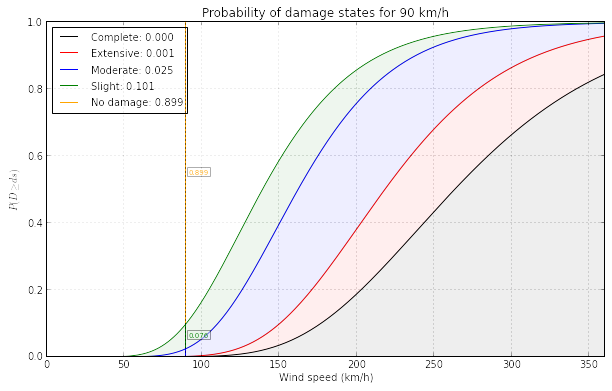

In [12]:
plotcurve(90)

The colour-coded numbers adjacent to the vertical line indicate the probability of this type of building being in the given damage state. At 180 km/h, there is a 22.4% probability of no damage to buildings of this type. There is a 13.9% probability of only slight damage, 38.3% probability of moderate damage, 14.4% probability of extensive damage and finally, just over 11% probability that the building type will be completely destroyed. A building type can be in any one of these states, the probability of it being in that state is defined by these curves. 

In any one land use polygon, there are a range of building types. Each building type has its own suite of fragility curves, dependent on the structural characteristics of that type. The complete table of building fragility curves is included at the bottom of this notebook.

## Exposure data

In GMMA RAP, the exposure database is based around land use polygons. Each land use polygon is attributed with floor areas of different building types, land use classifications and population per unit floor area (people per m$^2$). For determining the affected population, the number of people in each building type is proportional to the floor area of that building type in the land use polygon. And the total population of a land use polygon is the total floor area multiplied by the population per unit floor area. 

In [ ]:
FID,Shape,NAME,L5_USE,L4_USE,AREA_SQM,OID1,FOOTPR_PC,FLAREA_SUM,STOR_MAX,STOR_MIN,STOR_RANGE,STOR_MED,STOR_MAJ,STOR_MNR,STOR_MEAN,STOR_STD,W1,W2,W3,N,CHB,URA,URM,RM1,RM2,MWS,CWS,C1,C2,C4,PC1,PC2,S1,S2,S3,S4,FLAREA_L1,FLAREA_L2,FLAREA_M	FLAREA_H,FLAREA_V,FLAREA_E,,FLAREA_S,POP_SQM_FL,POP_EST,ERA_CONST,AGGPOLY_ID,W1_L_1,W2_L_1,W3_L_1,N_L_1,CHB_L_1,URA_L_1,URM_L_1,RM1_L_1,RM2_L_1,MWS_L_1,CWS_L_1,C1_L_1,C2_L_1,C4_L_1,PC1_L_1,PC2_L_1,S1_L_1,S2_L_1,S3_L_1,S4_L_1,W1_L_2,W2_L_2,W3_L_2,N_L_2,CHB_L_2,URA_L_2,URM_L_2,RM1_L_2,RM2_L_2,MWS_L_2,CWS_L_2,C1_L_2,C2_L_2,C4_L_2,PC1_L_2,PC2_L_2,S1_L_2,S2_L_2,S3_L_2,S4_L_2,W1_M,W2_M,W3_M,N_M,CHB_M,URA_M,URM_M,RM1_M,RM2_M,MWS_M,CWS_M,C1_M,C2_M,C4_M,PC1_M,PC2_M,S1_M,S2_M,S3_M,S4_M,W1_H,W2_H,W3_H,N_H,CHB_H,URA_H,URM_H,RM1_H,RM2_H,MWS_H,CWS_H,C1_H,C2_H,C4_H,PC1_H,PC2_H,S1_H,S2_H,S3_H,S4_H,W1_V,W2_V,W3_V,N_V,CHB_V,URA_V,URM_V,RM1_V,RM2_V,MWS_V,CWS_V,C1_V,C2_V,C4_V,PC1_V,PC2_V,S1_V,S2_V,S3_V,S4_V,W1_E,W2_E,W3_E,N_E,CHB_E,URA_E,URM_E,RM1_E,RM2_E,MWS_E,CWS_E,C1_E,C2_E,C4_E,PC1_E,PC2_E,S1_E,S2_E,S3_E,S4_E,W1_S,W2_S,W3_S,N_S,CHB_S,URA_S,URM_S,RM1_S,RM2_S,MWS_S,CWS_S,C1_S,C2_S,C4_S,PC1_S,PC2_S,S1_S,S2_S,S3_S,S4_S,Shape_Leng,REMARKS,Shape_Le_1,Shape_Area,vmax
80,'Polygon','','Residential','Formal Settlements',113864.493237,23634,0.182146,25761,6,1,5,1,1,6,1.24209,0.696785,1977.259794,0,0,891.923103,3577.120938,25.529151,14.864097,0,0,2333.560185,9060.968052,7435.526235,0,0,0,0,38.847588,0,17.826612,0,17852,3120,4787,0,0,0,0,0.021107,543.743568,1972-1992,'MUNTINLUPA - POBLACION',2525.1,0,0,1139,4568.2,32.6,19,0,0,0,0,9495.7,0,0,0,0,49.6,0,22.8,0,243.1,0,0,109.7,439.9,3.1,1.8,0,0,286.9,1114.2,914.3,0,0,0,0,4.8,0,2.2,0,0,0,0,0,0,0,0,0,0,0,0,4762.1,0,0,0,0,24.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1868.979849,'' ,1868.979849,113864.493237,35.9053


## Fragility curve table

This table contains the parameters for the full suite of fragility curves used in GMMA RAP. The scale parameter is used to 

| TYPE    | Vulnerability |    SD    |   Scale  | Slight |  SD  |   Scale  | Moderate |  SD  |   Scale  | Extensive |  SD  |   Scale  | Complete |  SD  |   Scale  |
|---------|:-------------:|:--------:|:--------:|:------:|:----:|:--------:|:--------:|:----:|:--------:|:---------:|:----:|:--------:|:--------:|:----:|:--------:|
| W1_L_1  |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W2_L_1  |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W3_L_1  |         95.31 |     0.25 |        1 |     62 | 0.16 |        1 |       82 | 0.17 |        1 |       120 | 0.26 |        1 |      180 | 0.28 |        1 |
| N_L_1   |           136 |      0.2 |        1 |    103 | 0.16 |        1 |      123 | 0.17 |        1 |       162 | 0.26 |        1 |      219 | 0.28 |        1 |
| CHB_L_1 |           455 |     0.59 |        1 |    164 | 0.15 |        1 |      188 | 0.19 |        1 |       230 | 0.22 |        1 |      324 | 0.17 |        1 |
| URA_L_1 |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| URM_L_1 |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM1_L_1 |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM2_L_1 |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| MWS_L_1 |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| CWS_L_1 |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| C1_L_1  |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| C2_L_1  |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| C4_L_1  |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| PC1_L_1 |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| PC2_L_1 |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| S1_L_1  |         379.1 |     0.61 |        1 |    154 | 0.35 |        1 |   180.45 |  0.4 |        1 |    202.75 | 0.43 |        1 |    315.1 | 0.46 |        1 |
| S2_L_1  |         379.1 |     0.61 |        1 |    154 | 0.35 |        1 |   180.45 |  0.4 |        1 |    202.75 | 0.43 |        1 |    315.1 | 0.46 |        1 |
| S3_L_1  |           387 |     0.37 |        1 |    231 | 0.24 |        1 |      270 | 0.24 |        1 |       322 | 0.24 |        1 |      478 | 0.36 |        1 |
| S4_L_1  |         379.1 |     0.61 |        1 |    154 | 0.35 |        1 |   180.45 |  0.4 |        1 |    202.75 | 0.43 |        1 |    315.1 | 0.46 |        1 |
| W1_L_2  |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W2_L_2  |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W3_L_2  |         95.31 |     0.25 |        1 |     62 | 0.16 |        1 |       82 | 0.17 |        1 |       120 | 0.26 |        1 |      180 | 0.28 |        1 |
| N_L_2   |           136 |      0.2 |        1 |    103 | 0.16 |        1 |      123 | 0.17 |        1 |       162 | 0.26 |        1 |      219 | 0.28 |        1 |
| CHB_L_2 |           455 |     0.59 |        1 |    164 | 0.15 |        1 |      188 | 0.19 |        1 |       230 | 0.22 |        1 |      324 | 0.17 |        1 |
| URA_L_2 |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| URM_L_2 |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM1_L_2 |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM2_L_2 |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| MWS_L_2 |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| CWS_L_2 |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| C1_L_2  |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| C2_L_2  |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| C4_L_2  |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| PC1_L_2 |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| PC2_L_2 |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| S1_L_2  |         379.1 |     0.61 |        1 |    154 | 0.35 |        1 |   180.45 |  0.4 |        1 |    202.75 | 0.43 |        1 |    315.1 | 0.46 |        1 |
| S2_L_2  |         379.1 |     0.61 |        1 |    154 | 0.35 |        1 |   180.45 |  0.4 |        1 |    202.75 | 0.43 |        1 |    315.1 | 0.46 |        1 |
| S3_L_2  |           387 |     0.37 |        1 |    231 | 0.24 |        1 |      270 | 0.24 |        1 |       322 | 0.24 |        1 |      478 | 0.36 |        1 |
| S4_L_2  |         379.1 |     0.61 |        1 |    154 | 0.35 |        1 |   180.45 |  0.4 |        1 |    202.75 | 0.43 |        1 |    315.1 | 0.46 |        1 |
| W1_M    |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W2_M    |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W3_M    |         95.31 |     0.25 |        1 |     62 | 0.16 |        1 |       82 | 0.17 |        1 |       120 | 0.26 |        1 |      180 | 0.28 |        1 |
| N_M     |           136 |      0.2 |        1 |    103 | 0.16 |        1 |      123 | 0.17 |        1 |       162 | 0.26 |        1 |      219 | 0.28 |        1 |
| CHB_M   |           455 |     0.59 |        1 |    164 | 0.15 |        1 |      188 | 0.19 |        1 |       230 | 0.22 |        1 |      324 | 0.17 |        1 |
| URA_M   |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| URM_M   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM1_M   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM2_M   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| MWS_M   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| CWS_M   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| C1_M    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| C2_M    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| C4_M    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| PC1_M   |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| PC2_M   |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| S1_M    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| S2_M    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| S3_M    |           387 |     0.37 |        1 |    231 | 0.24 |        1 |      270 | 0.24 |        1 |       322 | 0.24 |        1 |      478 | 0.36 |        1 |
| S4_M    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| W1_H    |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W2_H    |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W3_H    |         95.31 |     0.25 |        1 |     62 | 0.16 |        1 |       82 | 0.17 |        1 |       120 | 0.26 |        1 |      180 | 0.28 |        1 |
| N_H     |           136 |      0.2 |        1 |    103 | 0.16 |        1 |      123 | 0.17 |        1 |       162 | 0.26 |        1 |      219 | 0.28 |        1 |
| CHB_H   |           455 |     0.59 |        1 |    164 | 0.15 |        1 |      188 | 0.19 |        1 |       230 | 0.22 |        1 |      324 | 0.17 |        1 |
| URA_H   |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| URM_H   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM1_H   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM2_H   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| MWS_H   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| CWS_H   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| C1_H    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| C2_H    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| C4_H    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| PC1_H   |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| PC2_H   |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| S1_H    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| S2_H    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| S3_H    |           387 |     0.37 |        1 |    231 | 0.24 |        1 |      270 | 0.24 |        1 |       322 | 0.24 |        1 |      478 | 0.36 |        1 |
| S4_H    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| W1_V    |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W2_V    |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W3_V    |         95.31 |     0.25 |        1 |     62 | 0.16 |        1 |       82 | 0.17 |        1 |       120 | 0.26 |        1 |      180 | 0.28 |        1 |
| N_V     |           136 |      0.2 |        1 |    103 | 0.16 |        1 |      123 | 0.17 |        1 |       162 | 0.26 |        1 |      219 | 0.28 |        1 |
| CHB_V   |           455 |     0.59 |        1 |    164 | 0.15 |        1 |      188 | 0.19 |        1 |       230 | 0.22 |        1 |      324 | 0.17 |        1 |
| URA_V   |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| URM_V   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM1_V   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM2_V   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| MWS_V   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| CWS_V   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| C1_V    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| C2_V    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| C4_V    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| PC1_V   |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| PC2_V   |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| S1_V    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| S2_V    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| S3_V    |           387 |     0.37 |        1 |    231 | 0.24 |        1 |      270 | 0.24 |        1 |       322 | 0.24 |        1 |      478 | 0.36 |        1 |
| S4_V    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| W1_E    |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W2_E    |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W3_E    |         95.31 |     0.25 |        1 |     62 | 0.16 |        1 |       82 | 0.17 |        1 |       120 | 0.26 |        1 |      180 | 0.28 |        1 |
| N_E     |           136 |      0.2 |        1 |    103 | 0.16 |        1 |      123 | 0.17 |        1 |       162 | 0.26 |        1 |      219 | 0.28 |        1 |
| CHB_E   |           455 |     0.59 |        1 |    164 | 0.15 |        1 |      188 | 0.19 |        1 |       230 | 0.22 |        1 |      324 | 0.17 |        1 |
| URA_E   |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| URM_E   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM1_E   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM2_E   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| MWS_E   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| CWS_E   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| C1_E    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| C2_E    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| C4_E    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| PC1_E   |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| PC2_E   |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| S1_E    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| S2_E    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| S3_E    |           387 |     0.37 |        1 |    231 | 0.24 |        1 |      270 | 0.24 |        1 |       322 | 0.24 |        1 |      478 | 0.36 |        1 |
| S4_E    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| W1_S    |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W2_S    |           176 |     0.09 |        1 |    143 | 0.16 |        1 |      163 | 0.17 |        1 |       200 | 0.26 |        1 |      259 | 0.28 |        1 |
| W3_S    |         95.31 |     0.25 |        1 |     62 | 0.16 |        1 |       82 | 0.17 |        1 |       120 | 0.26 |        1 |      180 | 0.28 |        1 |
| N_S     |           136 |      0.2 |        1 |    103 | 0.16 |        1 |      123 | 0.17 |        1 |       162 | 0.26 |        1 |      219 | 0.28 |        1 |
| CHB_S   |           455 |     0.59 |        1 |    164 | 0.15 |        1 |      188 | 0.19 |        1 |       230 | 0.22 |        1 |      324 | 0.17 |        1 |
| URA_S   |       416.409 | 0.523497 |        1 |    132 | 0.17 |        1 |      208 | 0.16 |        1 |       240 | 0.14 |        1 |      301 | 0.17 |        1 |
| URM_S   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM1_S   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| RM2_S   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| MWS_S   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| CWS_S   |           321 |     0.52 |        1 |    139 | 0.34 |        1 |      162 |  0.3 |        1 |       218 | 0.29 |        1 |      263 | 0.31 |        1 |
| C1_S    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| C2_S    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| C4_S    |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| PC1_S   |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| PC2_S   |           221 |     0.33 | 0.133333 |    144 | 0.17 | 0.133333 |      171 | 0.17 | 0.133333 |       218 | 0.22 | 0.133333 |      270 | 0.17 | 0.133333 |
| S1_S    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| S2_S    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |
| S3_S    |           387 |     0.37 |        1 |    231 | 0.24 |        1 |      270 | 0.24 |        1 |       322 | 0.24 |        1 |      478 | 0.36 |        1 |
| S4_S    |           180 |     0.24 | 0.133333 |    140 | 0.15 | 0.133333 |      152 | 0.15 | 0.133333 |       188 | 0.21 | 0.133333 |      205 | 0.17 | 0.133333 |